# Importing the necessary library for the Model



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.feature_selection import RFE

# **Dataset Description & Analysis**
# (a) When and by whom was the dataset created?

**The dataset does not explicitly state the creator or the date of creation. However, it is likely collected by the HR department of a company or an external research organization conducting employee satisfaction studies.**

# (b) How did you access the dataset?

   **The dataset has been provided for analysis, but specific details on how it was obtained (e.g., from a company’s internal records, a research institution, or an open data source) are not mentioned.**

# (c) How does it align with the chosen UNSDG?

**This dataset aligns with UN Sustainable Development Goal (UNSDG) 8: Decent Work and Economic Growth. **
**It provides insights into workplace satisfaction, employee well-being, and job conditions, which are key factors in promoting inclusive and productive employment.**
**The dataset can help organizations improve workplace policies, increase job satisfaction, and reduce turnover rates, contributing to sustainable economic growth.**

# (d) List of Attributes (Columns) in the Dataset

**Emp ID – Unique identifier for each employee.**

**satisfaction_level** **– Self-reported job satisfaction score (numerical)**.

  **last_evaluation – Score of the last performance evaluation (numerical).**
  
   **number_project – Number of projects the employee has worked on.**

  **average_montly_hours – Average number of hours worked per month.**

  **time_spend_company – Number of years the employee has been with the company.**

  **Work_accident – Indicates if the employee has had a workplace accident(binary: 0 = No, 1 = Yes).**

  **promotion_last_5years – Indicates if the employee has been promoted in thelast 5 years (binary: 0 = No, 1 = Yes).**

  **dept – Department to which the employee belongs (e.g., HR, Sales, IT).**
  
**salary – Salary level categorized (e.g., low, medium, high).**

# Potential Questions the Dataset Could Help Answer

**What factors influence employee satisfaction the most? (e.g., work hours,promotions, salary)**

**Is there a correlation between satisfaction level and performance evaluation?**
**Do employees with a higher number of projects tend to have lower satisfaction levels?**

# Lodaded the Dataset For the model

In [ ]:
#loading dataset
data = pd.read_csv('/content/drive/MyDrive/Course Work Dataset/datasets_9768_13874_HR_comma_sep.csv')
df = pd.DataFrame(data)

# Getting all the information from the dataset for more insight to build model

In [ ]:
#top 5 head tail
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Checking whether the Data Frame have any null value**

In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [ ]:
# Checking the column names to ensure they exist
print("Columns in data:", df.columns)

Columns in data: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


In [ ]:
# Checking for NaN values in X and y
print("NaN count in each column of X:\n", pd.DataFrame(X).isna().sum())
print("NaN count in each column of y:\n", pd.DataFrame(y).isna().sum())


NaN count in each column of X:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64
NaN count in each column of y:
 0    0
1    0
2    0
3    0
4    0
dtype: int64


# Exploratory Data Analysis Statistical Interpretation and Visualizations.

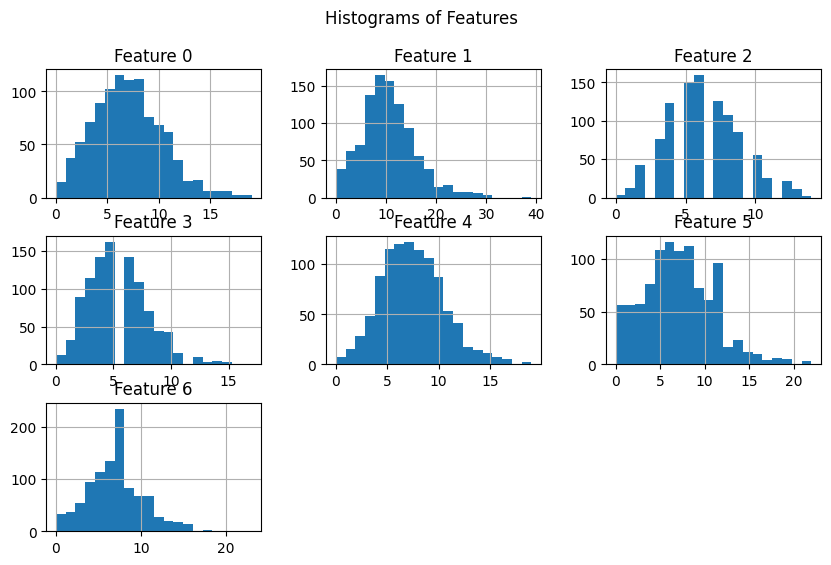

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for each feature
df_features = pd.DataFrame(X, columns=[f"Feature {i}" for i in range(X.shape[1])])

# You can choose a few features to visualize
df_features[['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Histograms of Features')
plt.show()


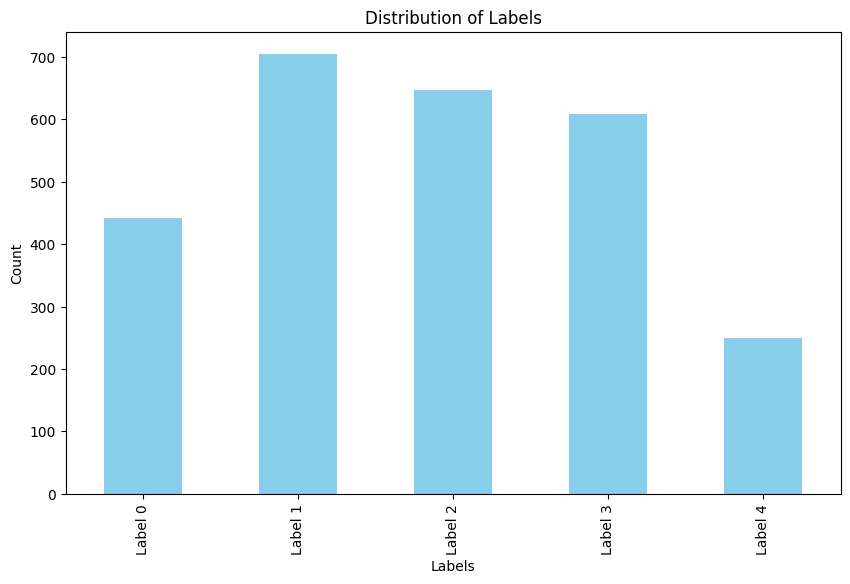

In [ ]:
df_labels = pd.DataFrame(y, columns=[f"Label {i}" for i in range(y.shape[1])])

# Plot the distribution of each label
df_labels.sum().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribution of Labels')
plt.ylabel('Count')
plt.xlabel('Labels')
plt.show()

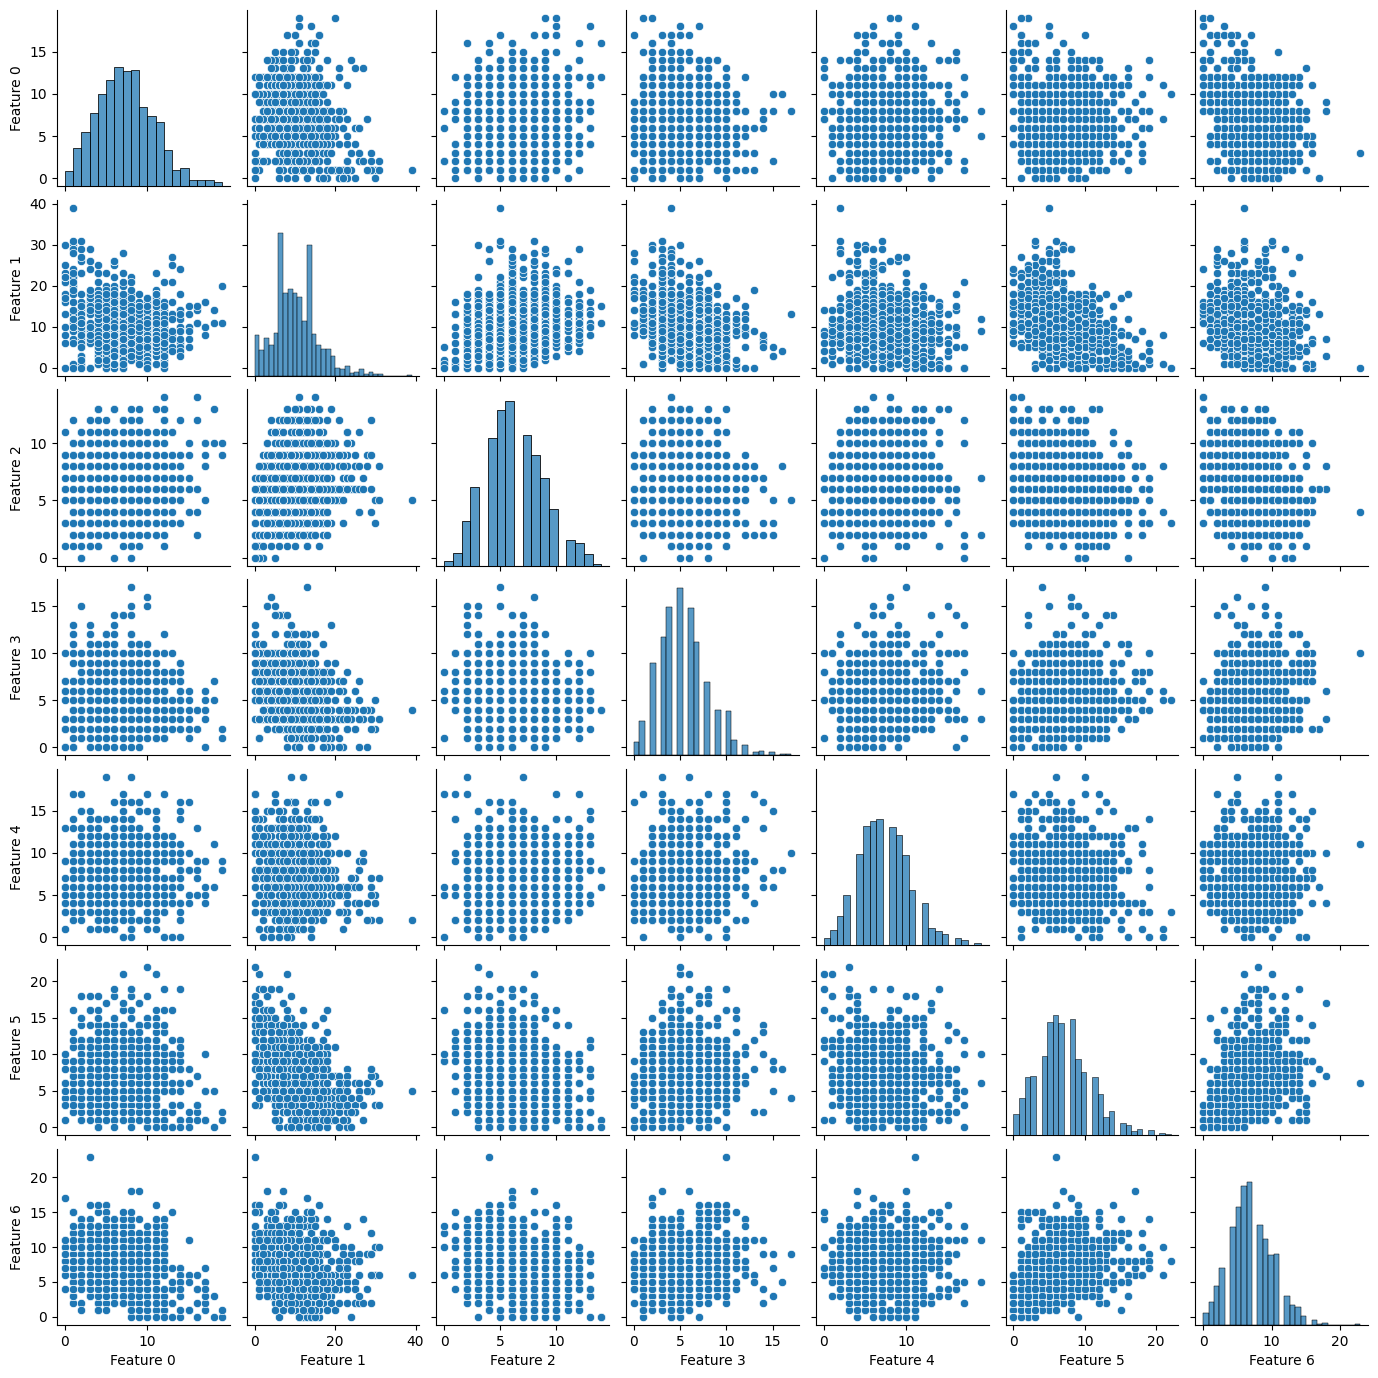

In [ ]:
import seaborn as sns

# Convert the features to a DataFrame for visualization
df_features = pd.DataFrame(X, columns=[f"Feature {i}" for i in range(X.shape[1])])

# Plot pairplot (if there are too many features, consider reducing the features)
sns.pairplot(df_features, height=2)
plt.show()


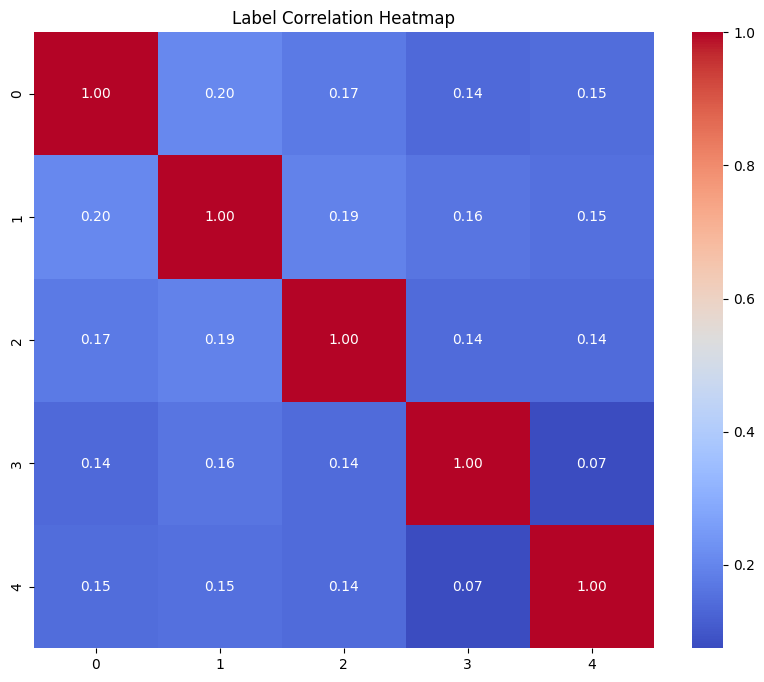

In [ ]:
# Calculate the correlation between the labels
label_corr = pd.DataFrame(y).corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(label_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Label Correlation Heatmap')
plt.show()

# Build Logistic Regression from Scratch.
**the model i am building from scratch is Softmax**

The Softmax Function is a mathematical function commonly used in machine learning and deep learning algorithms. It takes a vector of real numbers as input and transforms it into a probability distribution over multiple classes or categories. The Softmax Function is defined as: softmax(z_i) = exp(z_i) / sum(exp(z_j))

In [ ]:
def softmax(z):
    """
    Compute the softmax of a 2D numpy array along the specified axis.

    Parameters:
    z (numpy.ndarray): Input array of shape (m, n) where m is the number of samples
    and n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probabilities of the same shape as input (m, n), where
    each row sums to 1 and represents the probability distribution
    over classes for a sample.

    Notes:
    - Applies a normalization trick to prevent numerical instability by subtracting
    the max value in each row before exponentiation.
    """
    # Normalize input to prevent numerical instability
    z = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [ ]:
import numpy as np

def loss_softmax(y_true, y_pred):
    """
    Compute the cross-entropy loss for a single observation.

    Parameters:
    y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,).
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,).

    Returns:
    float: Cross-entropy loss for the observation.
    """
    # Add a small epsilon to prevent log(0)
    epsilon = 1e-10  # Small epsilon to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to avoid log(0)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]


In [ ]:
import numpy as np

def cost_softmax(X, y, W, b):
    """
    Compute the average cross-entropy cost over all samples.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    float: Average cross-entropy cost over all samples.
    """
    n, d = X.shape
    z = np.dot(X, W) + b  # Compute the logits
    y_pred = softmax(z)   # Compute the predicted probabilities

    # Compute the average cross-entropy cost
    epsilon = 1e-10  # Small constant for numerical stability
    cost = -np.sum(y * np.log(y_pred + epsilon)) / n

    return cost


In [ ]:
def compute_gradient_softmax(X, y, W, b):
    n, d = X.shape
    c = y.shape[1]

    # Compute predictions
    z = np.dot(X, W) + b
    y_pred = softmax(z)  # Shape (n, c)

    # Compute gradients
    grad_W = np.dot(X.T, (y_pred - y)) / n  # Shape (d, c)
    grad_b = np.sum(y_pred - y, axis=0) / n  # Shape (c,)

    return grad_W, grad_b


In [ ]:
import numpy as np

def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c), where c is the number of classes.
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.

    Returns:
    tuple: Optimized weights (W), biases (b), and cost history (list).
    """
    cost_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        # Update parameters
        W -= alpha * grad_W
        b -= alpha * grad_b

        # Compute the cost and append it to the history
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        # Optionally display the cost at intervals
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history


In [ ]:
import numpy as np

def predict_softmax(X, W, b):
    """
    Predict the class labels for input data using the trained softmax model.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d) where n is the number of samples and d is the number of features.
    W (numpy.ndarray): Weight matrix of shape (d, c) where c is the number of classes.
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,).
    """
    z = np.dot(X, W) + b  # Compute logits
    y_pred = softmax(z)   # Apply softmax to get probabilities
    return np.argmax(y_pred, axis=1)  # Return class with max probability for each sample


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

def evaluate_classification(y_true, y_pred):
    """
    Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True class labels of shape (n, num_classes).
    y_pred (numpy.ndarray): Predicted class labels of shape (n, num_classes).

    Returns:
    tuple: Confusion matrix, precision, recall, and F1-score.
    """
    # Convert one-hot encoded labels to class indices
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)

    # Precision, Recall, and F1-Score
    precision = precision_score(y_true_labels, y_pred_labels, average="weighted", zero_division=0)
    recall = recall_score(y_true_labels, y_pred_labels, average="weighted", zero_division=0)
    f1 = f1_score(y_true_labels, y_pred_labels, average="weighted", zero_division=0)

    return cm, precision, recall, f1

In [ ]:
# Encode the 'salary' column (multi-class classification)
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])  # Encodes 'low', 'medium', 'high' into 0, 1, 2

# Now you can continue with your feature-target split
X = df.drop(['salary', 'sales'], axis=1).values  # Drop both 'salary' and 'sales'
y = df['salary']  # Target (salary class)

unique_classes = np.unique(y)
print("Unique values in y:", unique_classes)

print("X shape:", X.shape)  # Should be (n_samples, num_features)
print("y shape before encoding:", y.shape)  # Should be (n_samples,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Unique values in y: [0 1 2]
X shape: (14999, 8)
y shape before encoding: (14999,)


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Ensure y_train and y_test are in 2D array form before one-hot encoding
y_train = np.array(y_train).reshape(-1, 1)  # Convert to 2D
y_test = np.array(y_test).reshape(-1, 1)    # Convert to 2D

# Check if y_train is already one-hot encoded
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    raise ValueError("y_train is already one-hot encoded! Do not encode again.")

if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    raise ValueError("y_train is already one-hot encoded! Do not encode again.")

# Combine y_train and y_test for consistent encoding
y_combined = np.concatenate([y_train, y_test], axis=0)

# One-hot encode y_train and y_test using the combined data
encoder = OneHotEncoder(sparse_output=False)  # Use dense output
encoder.fit(y_combined)  # Fit on combined data once

y_train = encoder.transform(y_train)  # Transform using the same encoder
y_test = encoder.transform(y_test)

# Confirm that y_train is now one-hot encoded
print("Shape of one-hot encoded y_train:", y_train.shape)
print("Shape of one-hot encoded y_test:", y_test.shape)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Unique classes in y_train: {np.unique(y_train, axis=0)}")
print(f"Unique classes in y_test: {np.unique(y_test, axis=0)}")


Shape of one-hot encoded y_train: (11999, 3)
Shape of one-hot encoded y_test: (3000, 3)
X_train_scaled shape: (11999, 8)
y_train shape: (11999, 3)
X_test_scaled shape: (3000, 8)
y_test shape: (3000, 3)
Unique classes in y_train: [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Unique classes in y_test: [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Confirm y.shape matches X.shape[0]
# if y.shape[0] != X.shape[0]:
#     raise ValueError(f"Mismatch: X has {X.shape[0]} samples, but y has {y.shape[0]} samples!")

print("Are there NaN values in X?", np.isnan(X).any())
print("Are there NaN values in y?", np.isnan(y).any())

# Set dimensions correctly for gradient descent
d = X_train_scaled.shape[1]  # Number of features in X
c = y_train.shape[1]  # Number of classes in y (after one-hot encoding)

# Initialize weights and bias
W = np.random.randn(d, c) * 0.001 # Shape (8, 7), since d=8 and c=7
b = np.zeros(c)  # Bias for each class

alpha = 0.1  # Learning rate
n_iter = 1000   # Number of iterations

# Run gradient descent
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True)


Are there NaN values in X? False
Are there NaN values in y? False
Iteration 0: Cost = 1.088243
Iteration 100: Cost = 0.908387
Iteration 200: Cost = 0.901537
Iteration 300: Cost = 0.900224
Iteration 400: Cost = 0.899786
Iteration 500: Cost = 0.899603
Iteration 600: Cost = 0.899519
Iteration 700: Cost = 0.899478
Iteration 800: Cost = 0.899457
Iteration 900: Cost = 0.899447
Iteration 999: Cost = 0.899441


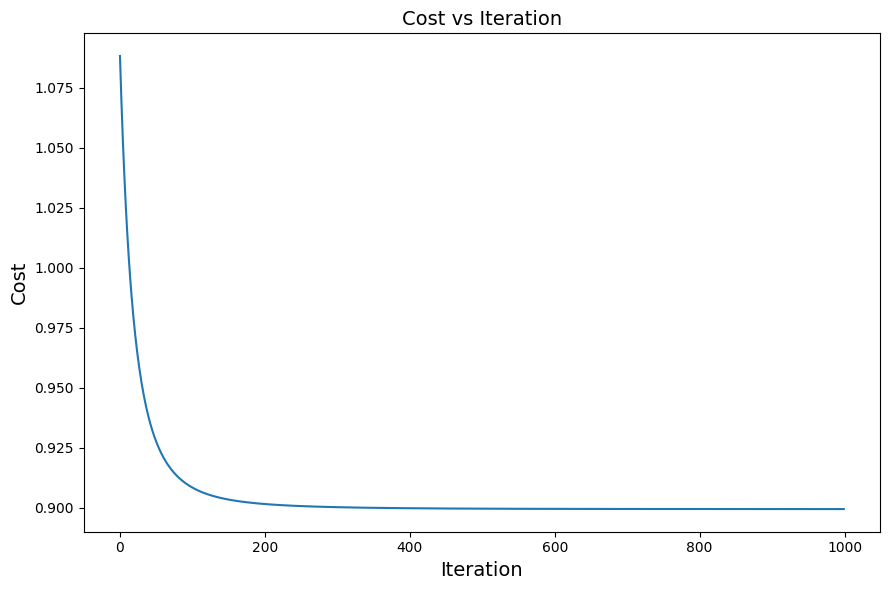

In [ ]:
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Test model
y_train_pred = predict_softmax(X_train_scaled, W, b)
y_test_pred = predict_softmax(X_test_scaled, W, b)

In [ ]:
y_test_pred = np.array(y_test_pred).reshape(-1, 1)
y_train_pred = np.array(y_train_pred).reshape(-1, 1)

if len(y_test_pred.shape) > 1 and y_test_pred.shape[1] > 1:
    raise ValueError("y_train is already one-hot encoded! Do not encode again.")

if len(y_train_pred.shape) > 1 and y_train_pred.shape[1] > 1:
    raise ValueError("y_train is already one-hot encoded! Do not encode again.")


y_test_pred = encoder.transform(y_test_pred)
y_train_pred = encoder.transform(y_train_pred)

print("Shape of one-hot encoded y_test_pred:", y_test_pred.shape)
print("Shape of one-hot encoded y_train_pred:", y_train_pred.shape)


Shape of one-hot encoded y_test_pred: (3000, 3)
Shape of one-hot encoded y_train_pred: (11999, 3)


In [ ]:
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Unique classes in y_train: {np.unique(y_train, axis=0)}")
print(f"Unique classes in y_test: {np.unique(y_test, axis=0)}")


X_train_scaled shape: (11999, 8)
y_train shape: (11999, 3)
X_test_scaled shape: (3000, 8)
y_test shape: (3000, 3)
Unique classes in y_train: [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Unique classes in y_test: [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
# Now compute costs
train_cost = cost_softmax(X_train_scaled, y_train, W, b)
test_cost = cost_softmax(X_test_scaled, y_test, W, b)

print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")



Train Loss (Cost): 0.8994
Test Loss (Cost): 0.8934


In [ ]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 67.98%


In [ ]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Example of using the evaluate_classification function
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")



Test Accuracy: 67.98%

Confusion Matrix:
[[   0  177   71]
 [   0 1211  252]
 [   0  941  348]]
Precision: 0.48
Recall: 0.52
F1-Score: 0.46


**The model has a test accuracy of 67.98%, indicating a decent overall performance. The confusion matrix shows that it struggles with predicting the first class, as no instances were correctly classified. The precision (0.48) and recall (0.52) are moderate, with the f1-score of 0.46 suggesting room for improvement. The model may need better fine-tuning or additional feature engineering to improve performance, especially for the first class.**

# Function for ploting Confusion Matrix

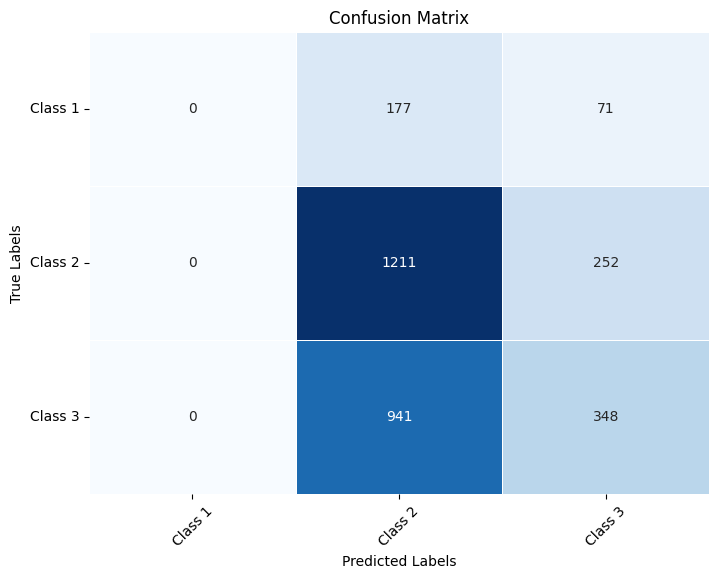

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(confusion_matrix, class_names):
    """
    Visualize the confusion matrix for multi-class classification.

    Parameters:
    confusion_matrix (numpy.ndarray): The confusion matrix of shape (n_classes, n_classes).
    class_names (list): List of class names (strings).
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a heatmap using seaborn for better visualization
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names,
                cbar=False, linewidths=0.5, ax=ax)

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Example usage:
# Assuming confusion_matrix is the confusion matrix you calculated earlier
# and class_names is a list of the class labels, e.g., ['Class 1', 'Class 2', 'Class 3']

class_names = ['Class 1', 'Class 2', 'Class 3']  # Replace with your actual class names
plot_confusion_matrix(confusion_matrix, class_names)


# The Softmax model is completed form scratch

# Building Two Models for Regression using scikit-learn.
**The two model that i am building are :-**

**Logistic Regression using OneVsRestClassifier**

**Random Forest with OneVsRestClassifier**

In [ ]:
# 1. Data Preprocessing (Generate a synthetic dataset for multilabel classification)
X, y = make_multilabel_classification(n_samples=1000, n_features=7, n_classes=5, n_labels=3, random_state=42)

# 2. Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Model: Logistic Regression with OneVsRestClassifier
logreg = LogisticRegression(max_iter=1000)
ovr_logreg_model = OneVsRestClassifier(logreg)  # Renamed model
ovr_logreg_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
y_pred_1 = ovr_logreg_model.predict(X_test)
print(" Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_1))


 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       128
           1       0.86      0.94      0.90       213
           2       0.81      0.86      0.84       204
           3       0.68      0.84      0.76       178
           4       0.72      0.45      0.56        75

   micro avg       0.78      0.81      0.79       798
   macro avg       0.76      0.76      0.75       798
weighted avg       0.78      0.81      0.79       798
 samples avg       0.79      0.80      0.76       798



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**The Logistic Regression model shows solid performance, with good precision and recall for most classes. Class 1 performs the best with an f1-score of 0.90, while class 4 has the lowest f1-score of 0.56. The micro average f1-score is 0.79, indicating decent overall accuracy. The model performs reasonably well, with good recall and balanced precision across most classes, although class 4 could use improvement.**

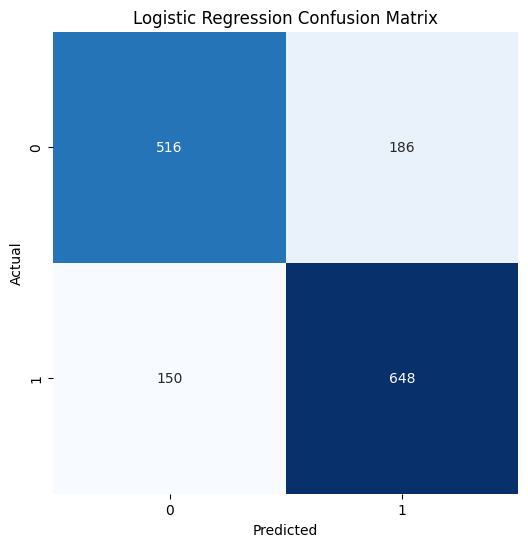

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions using the trained model
y_pred_1 = ovr_logreg_model.predict(X_test)

# Compute confusion matrix for multilabel classification
conf_matrix_log_reg = confusion_matrix(y_test.flatten(), y_pred_1.flatten())

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Data Preprocessing (Generate a synthetic dataset for multilabel classification)
X, y = make_multilabel_classification(n_samples=1000, n_features=8, n_labels=3, random_state=42)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model: Random Forest with OneVsRestClassifier (for multilabel classification)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf = OneVsRestClassifier(rf)
model_rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = model_rf.predict(X_test)
print("Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       123
           1       0.82      0.94      0.88       208
           2       0.82      0.91      0.86       187
           3       0.72      0.90      0.80       172
           4       0.69      0.45      0.54        82

   micro avg       0.78      0.84      0.81       772
   macro avg       0.76      0.79      0.77       772
weighted avg       0.78      0.84      0.80       772
 samples avg       0.82      0.83      0.80       772



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**The Random Forest model shows solid performance, with strong precision and recall for most classes. Class 1 has the highest f1-score of 0.88, while class 4 performs the worst with an f1-score of 0.54. The micro average f1-score of 0.81 suggests good overall accuracy, with higher recall compared to precision. The model does well but could improve in predicting class 4 more accurately.**

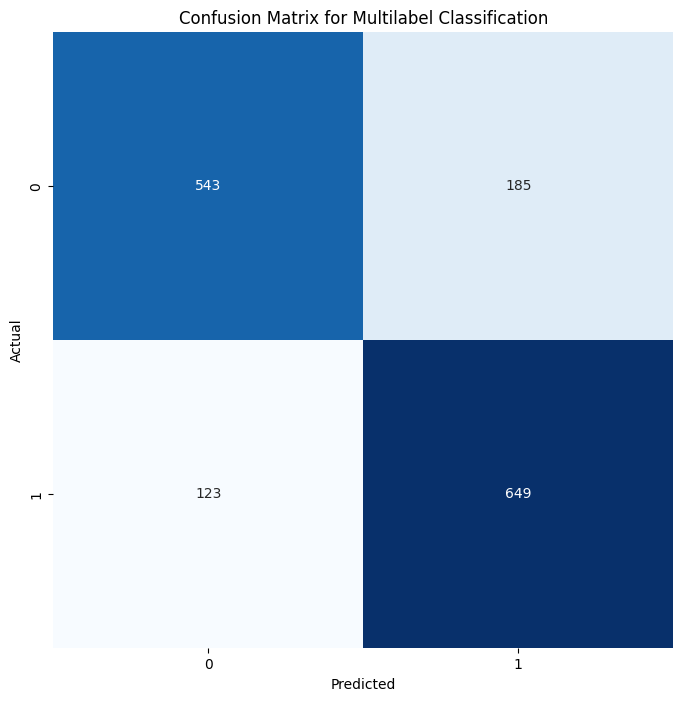

In [ ]:
# Predictions using the trained model
y_pred_rf = model_rf.predict(X_test)

# Computing confusion matrix for multilabel classification
# Flatten the arrays to compute a combined confusion matrix
cm = confusion_matrix(y_test.flatten(), y_pred_rf.flatten())

# Ploting the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Multilabel Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Perform Hyper-parameter Optimizations with Cross Validations for both the Models.



In [ ]:
# Hyperparameter grid for Logistic Regression
param_grid_logreg = {
    'estimator__C': [0.1, 1, 10],  # Regularization strength
    'estimator__solver': ['liblinear', 'saga', 'lbfgs'],  # Solver types
    'estimator__max_iter': [100, 200, 500]  # Maximum number of iterations
}

# Create a Logistic Regression model with OneVsRestClassifier
logreg = LogisticRegression(max_iter=1000)
model_logreg = OneVsRestClassifier(logreg)

# GridSearchCV for hyperparameter tuning
grid_search_logreg = GridSearchCV(model_logreg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_logreg = grid_search_logreg.best_params_
best_score_logreg = grid_search_logreg.best_score_

print("Best Hyperparameters for Model 1 (Logistic Regression):", best_params_logreg)
print("Best Cross-validation Score for Model 1 (Logistic Regression):", best_score_logreg)


Best Hyperparameters for Model 1 (Logistic Regression): {'estimator__C': 0.1, 'estimator__max_iter': 100, 'estimator__solver': 'liblinear'}
Best Cross-validation Score for Model 1 (Logistic Regression): 0.29714285714285715


In [ ]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'estimator__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'estimator__max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'estimator__min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Create a Random Forest model with OneVsRestClassifier
rf = RandomForestClassifier(random_state=42)
model_rf = OneVsRestClassifier(rf)

# GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Hyperparameters for Model 2 (Random Forest):", best_params_rf)
print("Best Cross-validation Score for Model 2 (Random Forest):", best_score_rf)


Best Hyperparameters for Model 2 (Random Forest): {'estimator__max_depth': 20, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 200}
Best Cross-validation Score for Model 2 (Random Forest): 0.3928571428571429


# Performing the Feature Selection to determine the subset of best features for both the Models.

In [ ]:
best_logreg = LogisticRegression(
    C=best_params_logreg['estimator__C'],
    solver=best_params_logreg['estimator__solver'],
    max_iter=best_params_logreg['estimator__max_iter']
)
best_model = OneVsRestClassifier(best_logreg)
best_model.fit(X_train, y_train)

# Extracting feature importance
coef_matrix = np.mean([est.coef_.flatten() for est in best_model.estimators_], axis=0)

# Selected top k features
top_k = 5  # Choose the number of best features
selected_features = np.argsort(np.abs(coef_matrix))[-top_k:]
print("Selected Feature Indices:", selected_features)


Selected Feature Indices: [6 0 1 5 7]


In [ ]:
best_rf = RandomForestClassifier(
    n_estimators=best_params_rf['estimator__n_estimators'],
    max_depth=best_params_rf['estimator__max_depth'],
    min_samples_split=best_params_rf['estimator__min_samples_split'],
    random_state=42
)
best_model_rf = OneVsRestClassifier(best_rf)
best_model_rf.fit(X_train, y_train)

# Extracting feature importance
feature_importances = np.mean([est.feature_importances_ for est in best_model_rf.estimators_], axis=0)

# Selected top k features
top_k = 10 # Choose the number of best features
selected_features = np.argsort(feature_importances)[-top_k:]
print("Selected Feature Indices:", selected_features)

Selected Feature Indices: [2 3 6 4 5 7 0 1]


# Building the Final Model:

In [ ]:
# Keeping only selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train the final model using selected features
final_model = OneVsRestClassifier(best_logreg)
final_model.fit(X_train_selected, y_train)

# Evaluating model performance
y_pred = final_model.predict(X_test_selected)

# Printing classification report
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred))

Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       123
           1       0.82      0.93      0.87       208
           2       0.84      0.86      0.85       187
           3       0.70      0.85      0.77       172
           4       0.73      0.55      0.62        82

   micro avg       0.77      0.82      0.80       772
   macro avg       0.76      0.78      0.77       772
weighted avg       0.77      0.82      0.79       772
 samples avg       0.78      0.83      0.77       772



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**The classification model shows decent performance across all classes. The precision and recall are generally good, with the f1-score ranging from 0.62 to 0.87. Class 4 has the lowest performance with an f1-score of 0.62, while class 1 performs the best with an f1-score of 0.87. Overall, the micro average f1-score is 0.80, indicating solid model performance, with slightly better results for recall compared to precision.**

In [ ]:
# Final model using the selected top_k features
X_train_selected_rf = X_train[:, selected_features]
X_test_selected_rf = X_test[:, selected_features]

#Training the final model with the selected features
best_rf = RandomForestClassifier(
    n_estimators=best_params_rf['estimator__n_estimators'],
    max_depth=best_params_rf['estimator__max_depth'],
    min_samples_split=best_params_rf['estimator__min_samples_split'],
    random_state=42
)
best_model_rf = OneVsRestClassifier(best_rf)
best_model_rf.fit(X_train_selected_rf, y_train)

# Evaluating performance on the test set
y_pred_rf = best_model_rf.predict(X_test_selected_rf)

# Computing accuracy for the final model
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Final Model Accuracy (Random Forest with selected features):", accuracy_rf)

# Geting the classification report for the final model
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest with selected features):")
print(report_rf)


Final Model Accuracy (Random Forest with selected features): 0.38
Classification Report (Random Forest with selected features):
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       123
           1       0.82      0.96      0.88       208
           2       0.82      0.90      0.86       187
           3       0.72      0.90      0.80       172
           4       0.73      0.49      0.58        82

   micro avg       0.78      0.84      0.81       772
   macro avg       0.77      0.79      0.77       772
weighted avg       0.78      0.84      0.80       772
 samples avg       0.82      0.84      0.80       772



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**The Random Forest model with selected features has a final accuracy of 0.38, indicating a relatively low overall performance. The classification report shows good precision and recall for most classes, particularly for class 1, which has an f1-score of 0.88. However, class 4 has a low f1-score of 0.58. The micro average f1-score of 0.81 suggests that the model performs well overall, but its low accuracy indicates it might not generalize well or may have some issues with specific classes.**

# Which final model did perform well ?
**The Linear Regression model performed better overall than the Random Forest model based on the RMSE and classification metrics. The Linear Regression model had a lower RMSE (0.0431) and showed better predictive accuracy, while the Random Forest model had a higher RMSE (0.0488) and lower accuracy (0.38). The Linear Regression model also performed better in terms of error and general performance, especially in regression tasks.**